#**Machine learning techniques towards working condition analysis**



---

Through this notebook and subsequents, you will be guided through the visualizations, data comprenhension and code behind the models developed. 

## **Instructions**

This notebook should be initialized after uploading the data that can be downloaded through the following link: [EMPLOYEE ATTRITION DATASET](https://www.kaggle.com/datasets/patelprashant/employee-attrition)

### The code for the project is displayed in the following way:

In this notebook, the core one, model's notebooks are embedded.

In addition, in this core notebook
we will have:

1.   the libraries that need to be imported
2.   Data inspection and cleaning
3.   Plots & visualizations 

This three sections will be followed by the 'NOTEBOOKS' section, that is also divided into three subsections:


1.   Support Vectore Machine Classification Notebook
2.   Desion Tree Classification Notebook
3.   Random Forest Regression Notebook 

These notebooks contain the three different models used on the project.Each of these notebooks should be opened by clicking the link and initialized uploading the data "Attrition.csv" that will be generated later in this core notebook.

Last instruction: **Enjoy it.**

## **Import Libraries**

In [ ]:
import pandas as  pd
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

## **Data inspection and cleaning**

Let's take a look of our initial data:

In [ ]:
data = input("Enter the route of the data")
df = pd.read_csv(data)
df.head(20)

Enter the route of the data/content/HR Employee Attrition.csv


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


Analyze if there are null values and understand the datatypes of each of the columns, as well as the amount of entries.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

The Dataset contains 1470 entries, 35 columns, no null values and some categorical data.

Lets see the amount of unique values that each single column can get. If there's any column with just one possible single value, we will drop it.

In [ ]:
print(df.nunique())
for i in df.keys():
  if df[i].nunique() <= 1: 
    df = df.drop([i], axis = 1) #drop column if there is only one value in the entire column
df.info()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

Analyze correlations between features:


In [ ]:
#MATRIX OF CORRELATIONS BETWEEN FEATURES 
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.046247,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656


In order to make it more visual we compute and present with a colormap the values of the correlations between features.

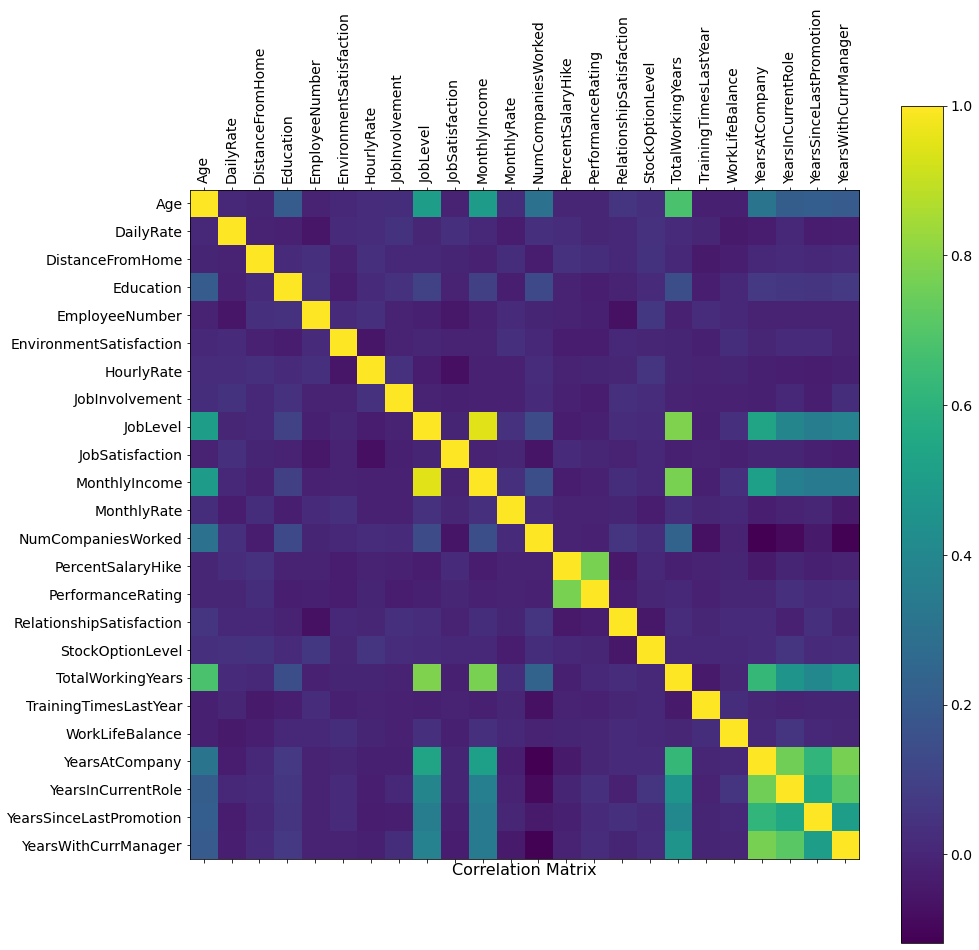

In [ ]:
#COMPUTE AND REPRESENT WITH A COLORMAP THE VALUES OF THE CORRELATIONS BETWEEN FEATURES 
f = plt.figure(figsize=(15, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.xlabel('Correlation Matrix', fontsize=16);

Now we want to transform the categorical data to numerical data so we can use them easily for regression models or classification models. But, first we take a look to the categorical variables:

In [ ]:
df.select_dtypes(include=['object']).head() 

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


We transform the categorical variables to numerical ones using a label encoder that does it automatically. But, first, we transform manually the 'BusinessTravel' column so the values correspond in ascendent order to the frequency of time.

In [ ]:
#We want to convert the categorical data into numerical using label encoder or list comprehension  

df['BusinessTravel'] = [2 if t == 'Travel_Frequently' else 1 if t == 'Travel_Rarely' else 0 for t in df['BusinessTravel']]

def auto_label_encoder(data):  
  le = LabelEncoder()

  for col in df.keys():
    if data[col].dtypes == "O":
      data[col] = le.fit_transform(df[col])

auto_label_encoder(df)

df.tail(20)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1450,35,0,1,1146,0,26,4,1,2040,3,...,3,3,0,9,2,3,9,0,1,7
1451,38,0,1,345,2,10,2,1,2041,1,...,3,3,1,10,1,3,10,7,1,9
1452,50,1,2,878,2,1,4,1,2044,2,...,3,4,2,12,3,3,6,3,0,1
1453,36,0,1,1120,2,11,4,2,2045,2,...,3,1,1,8,2,2,6,3,0,0
1454,45,0,1,374,2,20,3,1,2046,4,...,3,3,0,8,3,3,5,3,0,1
1455,40,0,1,1322,1,2,4,1,2048,3,...,3,4,0,8,2,3,2,2,2,2
1456,35,0,2,1199,1,18,4,1,2049,3,...,3,4,2,10,2,4,10,2,0,2
1457,40,0,1,1194,1,2,4,3,2051,3,...,3,2,3,20,2,3,5,3,0,2
1458,35,0,1,287,1,1,4,1,2052,3,...,3,4,1,4,5,3,4,3,1,1
1459,29,0,1,1378,1,13,2,4,2053,4,...,3,1,1,10,2,3,4,3,0,3


Since this column is misleading we won't consider it.

In [ ]:
df = df.drop(["EmployeeNumber"], axis=1)
df["MonthlyIncome"].head()

0    5993
1    5130
2    2090
3    2909
4    3468
Name: MonthlyIncome, dtype: int64

Now the dataset contains only numerical clean data and is ready to be used for training our model, so we save it in another .csv file, that will be use in the other notebooks.

In [ ]:
#Be patient, these could take a bit, it will suddenly appear loaded in the left part of your screen if you are in colab. Meanwhile, you can start enjoying the plots.
df.to_csv('Attrition.csv')

## **Visualizations**


We did some plots to understand how the data look like, the relation between variables and frequencies in values

In the next two plots we can see how many people (percentage) suffer from attrition and how many do not have attrition:

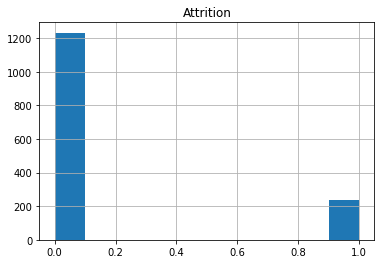

In [ ]:
df.hist("Attrition")
plt.show()

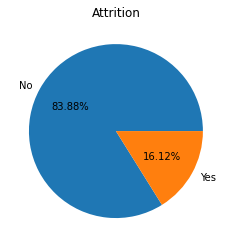

In [ ]:
plt.pie(df['Attrition'].value_counts(), autopct='%1.2f%%', labels=['No', 'Yes']);
plt.title("Attrition")
plt.show()

The next to plots show the distribution of monthly income and the density of people with attrition and without attrition according to the distance from home in which we can see that the density of people suffering attrition is higher when the distance from home is higher 

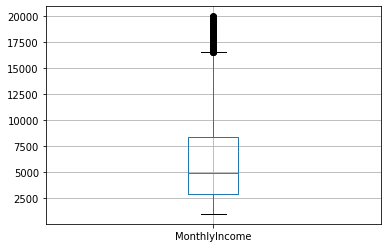

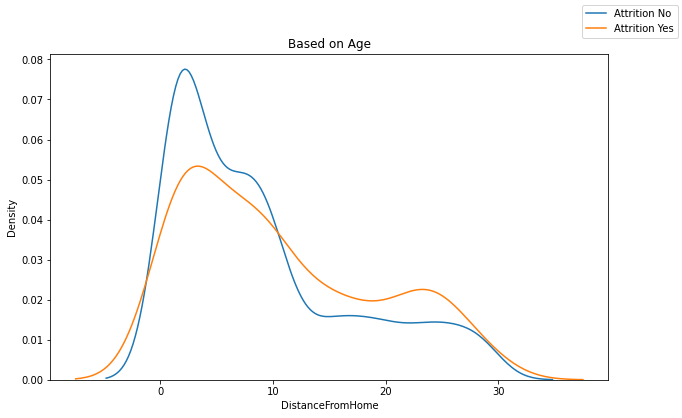

In [ ]:
df.boxplot(column='MonthlyIncome')
plt.show()

fig = plt.figure(figsize=(10,6))

sns.kdeplot(df[df['Attrition']== 0]['DistanceFromHome'])
sns.kdeplot(df[df['Attrition']== 1]['DistanceFromHome'])
fig.legend(labels=['Attrition No', 'Attrition Yes'])
  
plt.title('Based on %s'%'Age')
plt.show()

A plot about the performance in which there are only two types of ratings and the first one is the most frequent 

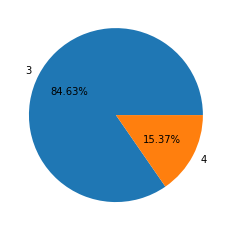

In [ ]:
plt.pie(df['PerformanceRating'].value_counts(), autopct='%1.2f%%', labels=['3','4'] );
plt.show()

Let's take a look at the histograms of each variable to see the frequency of their values: 

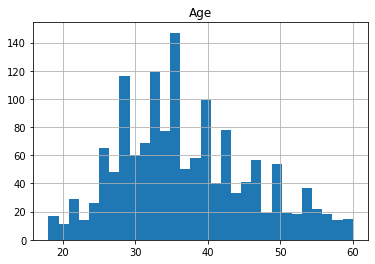

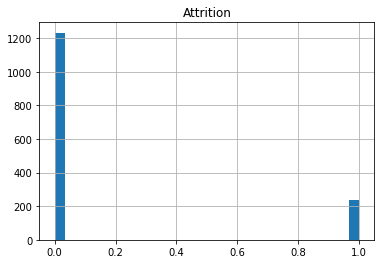

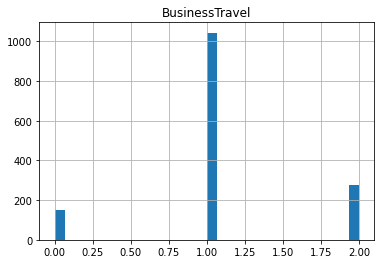

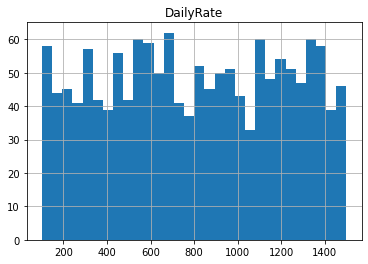

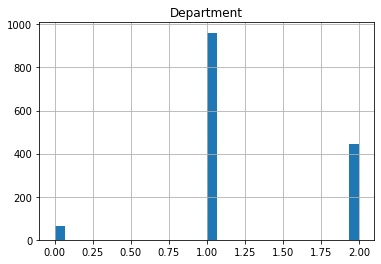

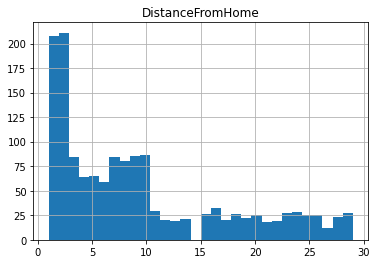

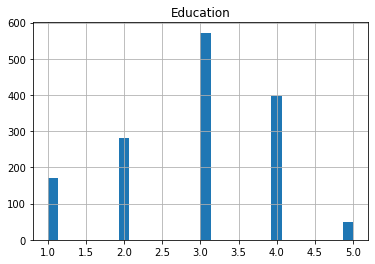

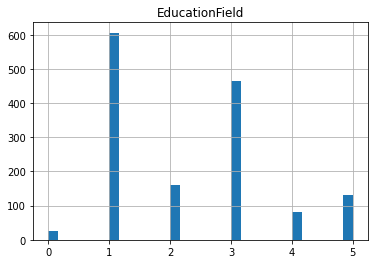

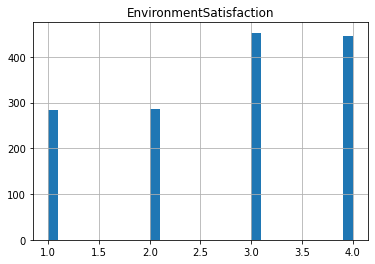

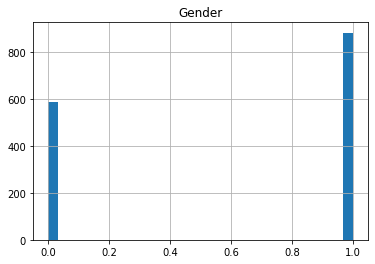

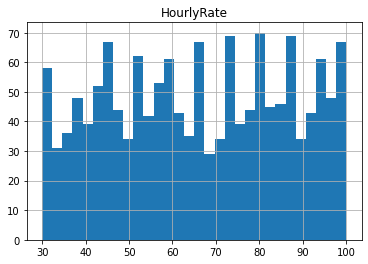

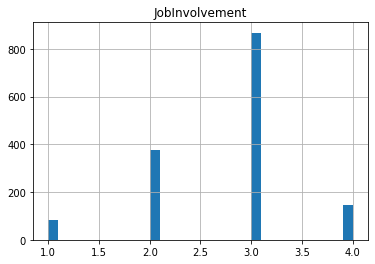

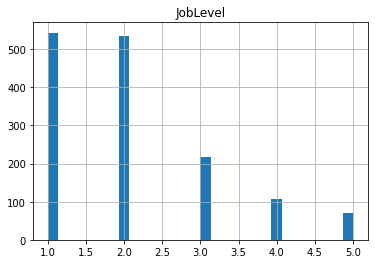

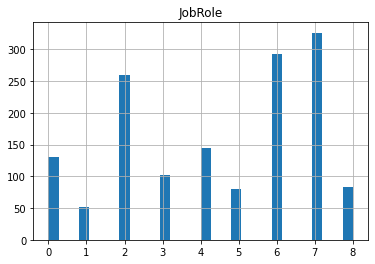

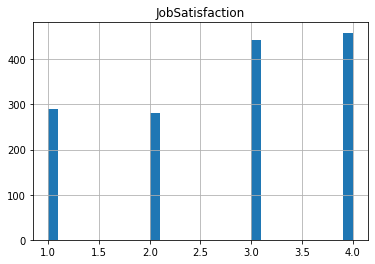

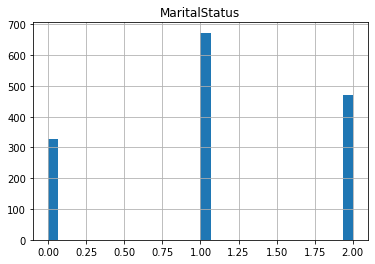

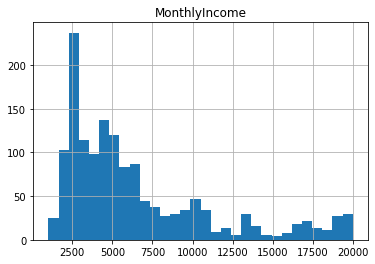

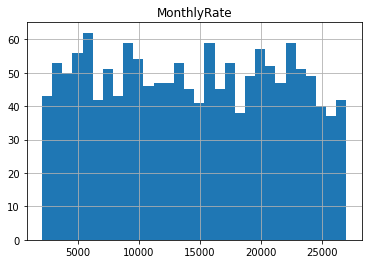

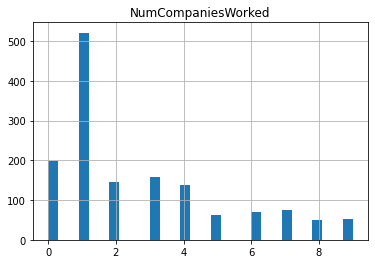

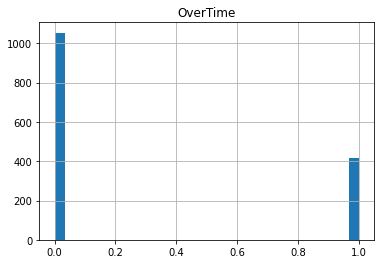

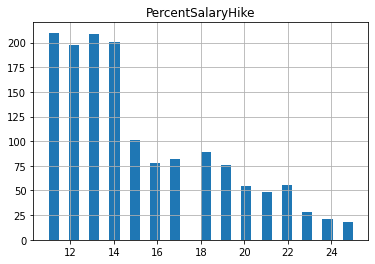

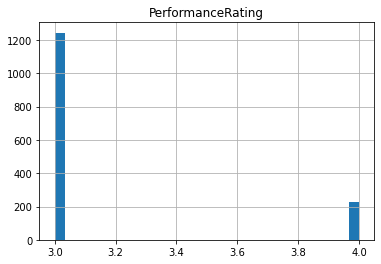

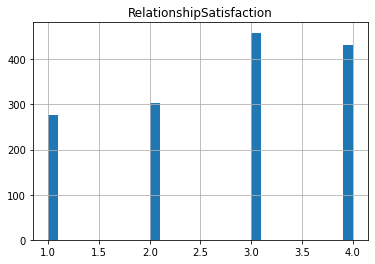

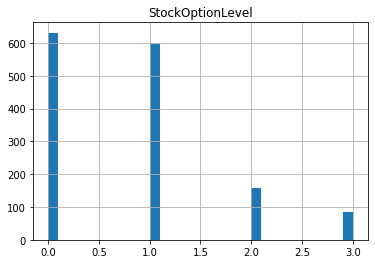

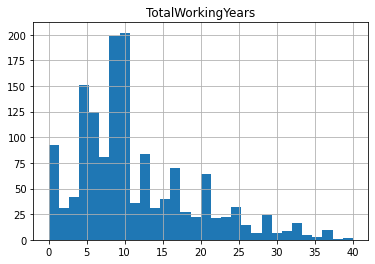

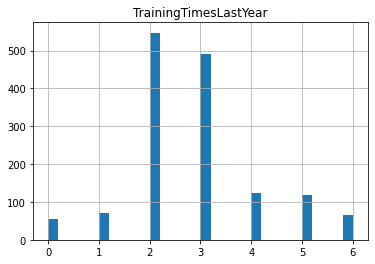

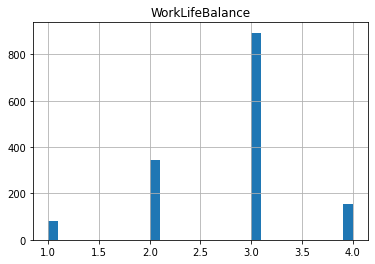

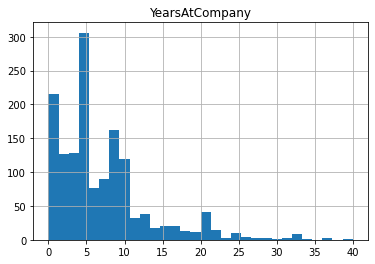

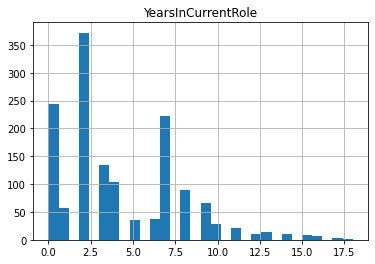

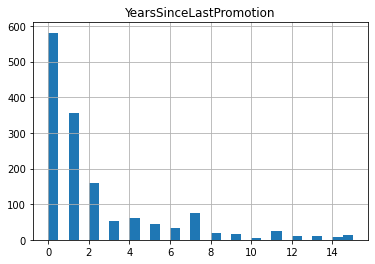

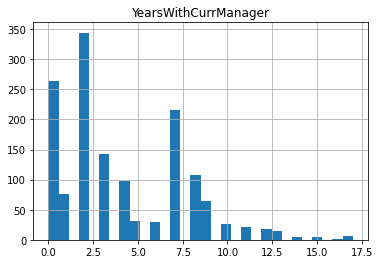

In [ ]:
for key in df.keys():
  df.hist(key, bins = 30)
  plt.show()


A 3D representation of the Environment Satisfaction according to Monthly Income, Years at company and Total Years Working. It seem that people have any kind of satisfaction no matter the monthly income nor Years at company or working.

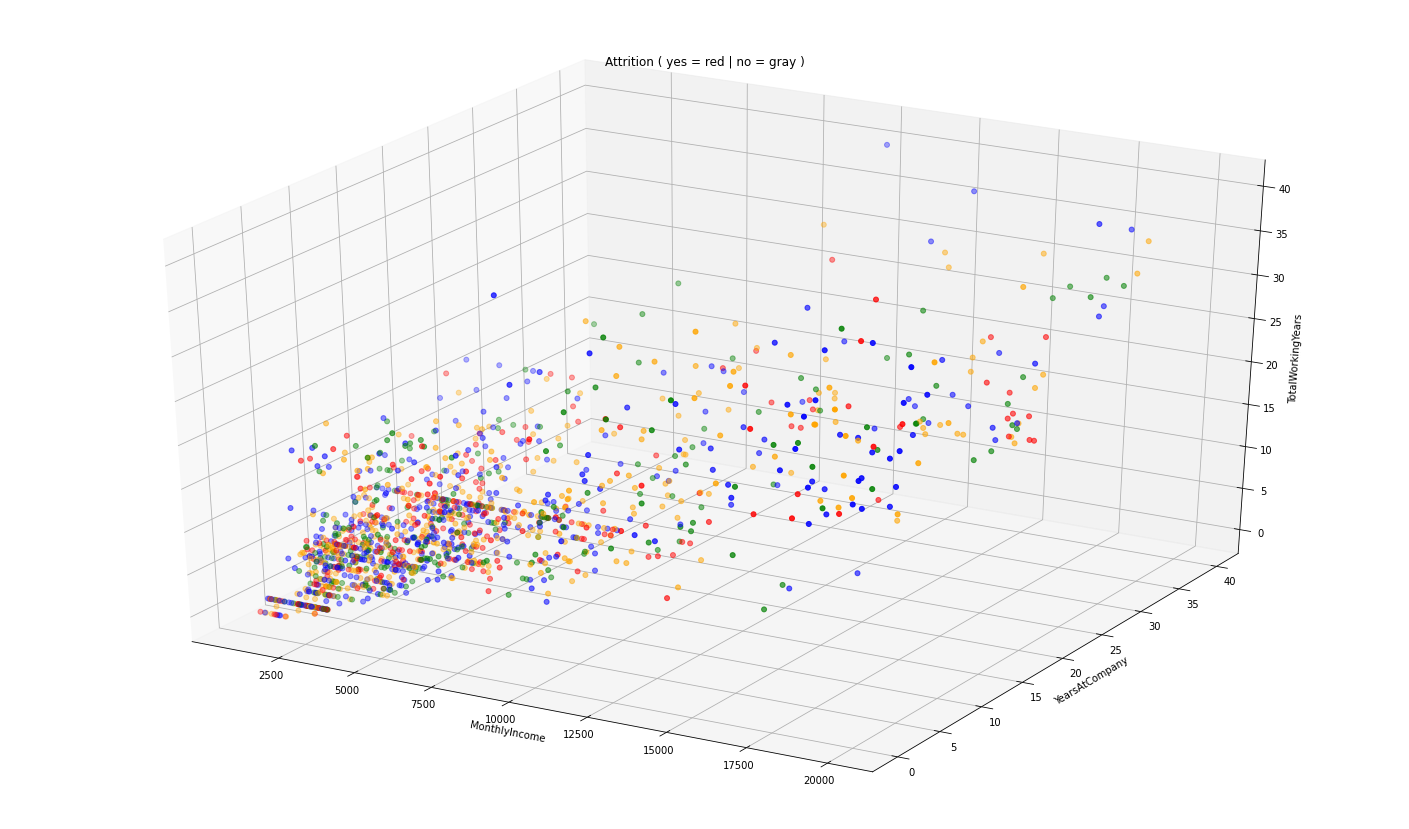

In [ ]:
color=["green", "red", "orange", "blue"]
assign = []
for e in df['EnvironmentSatisfaction']:
    assign.append(color[e - 1])

fig = plt.figure(figsize=(25, 15))
ax = fig.add_subplot(projection='3d')

ax.scatter(df['MonthlyIncome'], df['YearsAtCompany'], df['TotalWorkingYears'], c=assign, s=25)
ax.set_xlabel('MonthlyIncome')
ax.set_ylabel('YearsAtCompany')
ax.set_zlabel('TotalWorkingYears')
plt.title("Attrition ( yes = red | no = gray )")
plt.show()

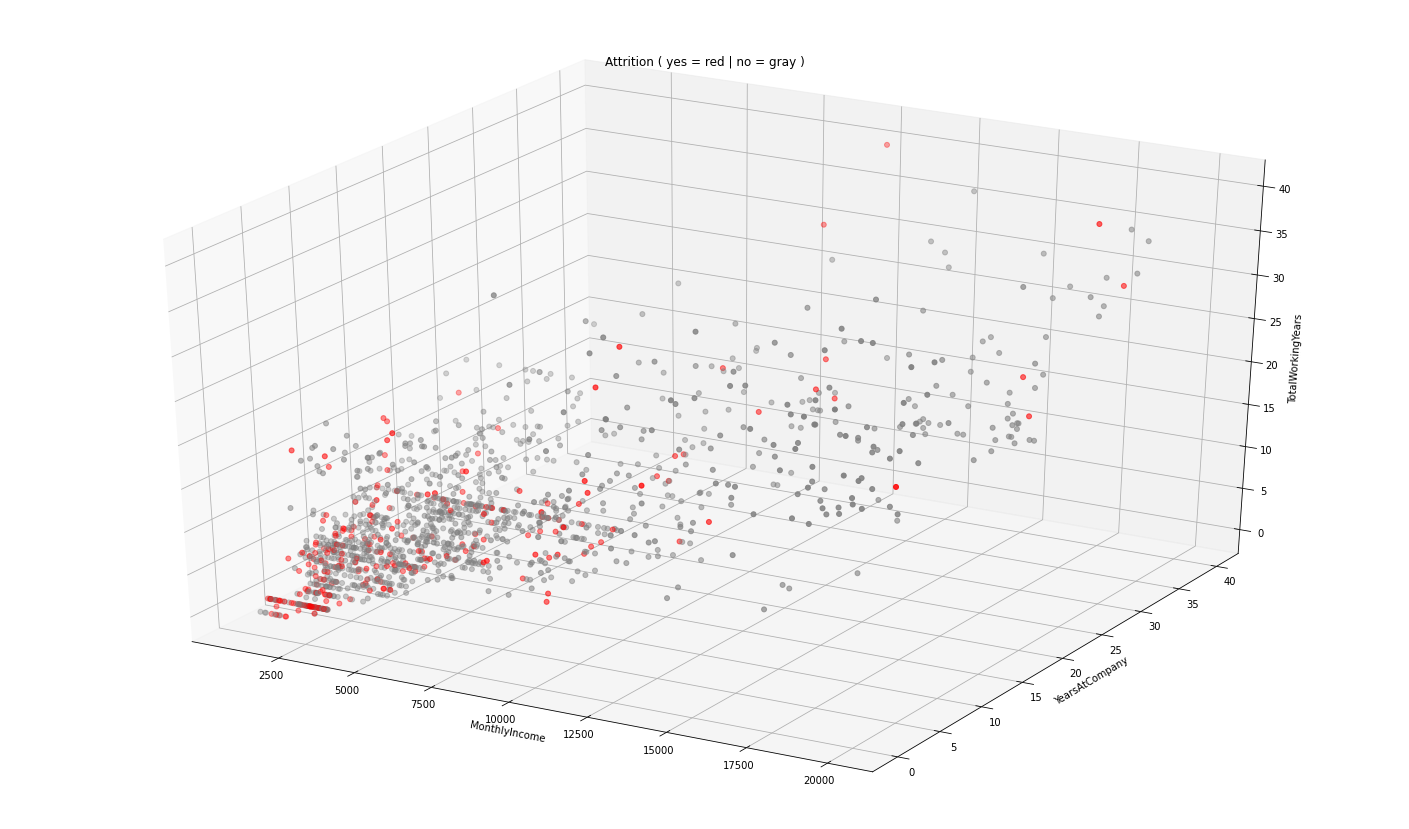

In [ ]:
color=["gray", "red"]
assign = []
for element in df['Attrition']:
  if element == 0:
    assign.append(color[0])
  else:
    assign.append(color[1])

fig = plt.figure(figsize=(25, 15))
ax = fig.add_subplot(projection='3d')

ax.scatter(df['MonthlyIncome'], df['YearsAtCompany'], df['TotalWorkingYears'], c=assign, s=25)
ax.set_xlabel('MonthlyIncome')
ax.set_ylabel('YearsAtCompany')
ax.set_zlabel('TotalWorkingYears')
plt.title("Attrition ( yes = red | no = gray )")
plt.show()

According to the previous plot and the next one, the Monthly Income is an important factor to predict whether the people will suffer from attition or not. Most of the people that suffers from attrition has a low Monthly income. We can also see that Monthly income and Total Working Years are correlated.

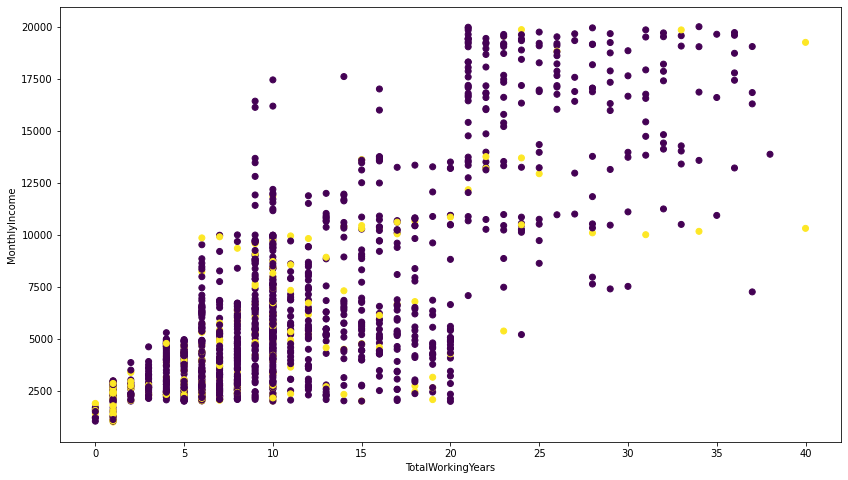

In [ ]:
plt.figure(figsize=(14,8))
plt.scatter(df['TotalWorkingYears'], df['MonthlyIncome'], c=df['Attrition'])
plt.xlabel('TotalWorkingYears')
plt.ylabel('MonthlyIncome')
plt.show()

##**NOTEBOOKS**

Note: In all following notebooks the already generated Attrition.csv dataset should be uploaded manually. 

### **Support Vector Machine Classification**

[Support Vectore Machine Classification  Notebook](https://colab.research.google.com/drive/1_zPw2MKSl6xrcpcITdENGPPtfSIidspe?usp=sharing)

###**Desion Tree Classification**


[Desion Tree Classification Notebook](https://colab.research.google.com/drive/18vAt42wMwL82FnKKtXy6ao_2Qy6mzq5X?usp=sharing)

###**Random Forest Regression**

[Random Forest Regression Notebook](https://colab.research.google.com/drive/1eZGF_Z-gRB7s0Re_52WCxdGhw9iClIwK#scrollTo=KyU4bzGB7oPI)